# K - Means Clustering Implementation on Loan Dataset

Dataset Link: https://www.kaggle.com/datasets/surajiiitm/big-mart-sale

In [ ]:
Registration_Number = "22011103020"
Name = "Jayashre"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Jayashre and my roll no : 22011103020
Computer IP Address is: 172.28.0.12


In [ ]:
import pandas as pd

dataset = pd.read_csv("drive/MyDrive/Colab Notebooks/clustering.csv")

df = dataset.copy()

In [ ]:
print(df)

print("--------------------------------")

print(df.describe())

print("--------------------------------")

print(df.info())

print("--------------------------------")

print(df.columns)

print("--------------------------------")

print(df.isnull().sum())

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0           

In [ ]:
df = df.dropna()

In [ ]:
print(df.info())

print("--------------------------------")

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    object 
 2   Married            308 non-null    object 
 3   Dependents         308 non-null    object 
 4   Education          308 non-null    object 
 5   Self_Employed      308 non-null    object 
 6   ApplicantIncome    308 non-null    int64  
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    float64
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    float64
 11  Property_Area      308 non-null    object 
 12  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 33.7+ KB
None
--------------------------------
Loan_ID              0
Gender               0
Married              0
Depen

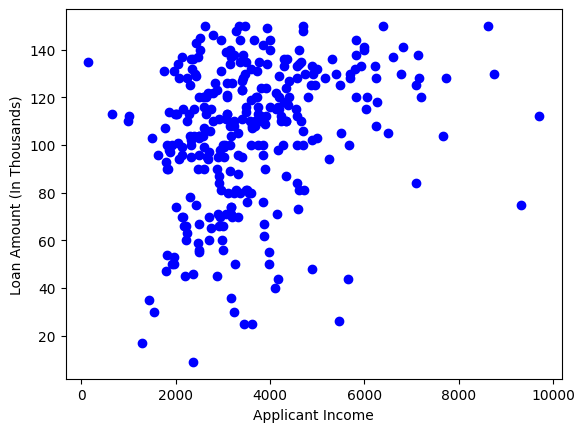

In [ ]:
import matplotlib.pyplot as plt

X = df[["ApplicantIncome", "LoanAmount"]]
# Visualize data point
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="blue")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount (In Thousands)")
plt.show()

### Step 1: Choose the number of clusters k

In [ ]:
K=3

### Step 2: Select k random points from the data as centroids

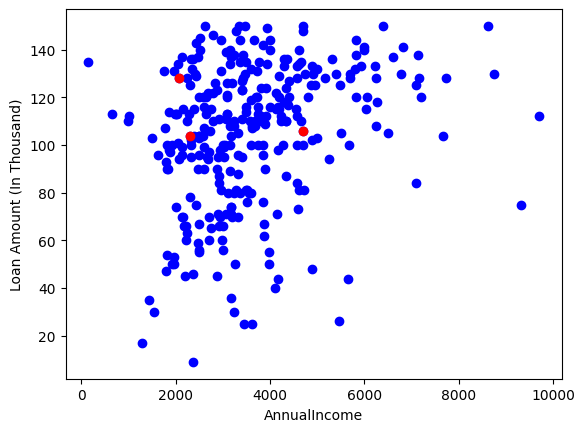

In [ ]:
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="blue")
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c="red")
plt.xlabel("AnnualIncome")
plt.ylabel("Loan Amount (In Thousand)")
plt.show()

### Step 3: Assign all the points to the closest cluster centroid
### Step 4: Recompute centroids of newly formed clusters
### Step 5: Repeat step 3 and 4

In [ ]:
from math import sqrt

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2 = (row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1

    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome'color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()]).sum()
        print("-----------------------------------", diff.sum(), "-----------------------------------")
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-9-44fa5bc4e215>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
<ipython-input-9-44fa5bc4e215>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
<ipython-input-9-44fa5bc4e215>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] 

----------------------------------- 617.7034283224306 -----------------------------------
----------------------------------- 518.1352111205274 -----------------------------------


<ipython-input-9-44fa5bc4e215>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
<ipython-input-9-44fa5bc4e215>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-9-44fa5bc4e215>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

----------------------------------- 523.8318996384309 -----------------------------------
----------------------------------- 383.28138363975495 -----------------------------------
----------------------------------- 335.56635614309994 -----------------------------------


<ipython-input-9-44fa5bc4e215>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
<ipython-input-9-44fa5bc4e215>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-9-44fa5bc4e215>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

----------------------------------- 322.18347542546826 -----------------------------------
----------------------------------- 332.11758639279105 -----------------------------------
----------------------------------- 196.08737733717268 -----------------------------------


<ipython-input-9-44fa5bc4e215>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-9-44fa5bc4e215>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
<ipython-input-9-44fa5bc4e215>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

----------------------------------- 79.5179853416829 -----------------------------------
----------------------------------- 76.65175607931808 -----------------------------------
----------------------------------- 0.0 -----------------------------------


<ipython-input-9-44fa5bc4e215>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


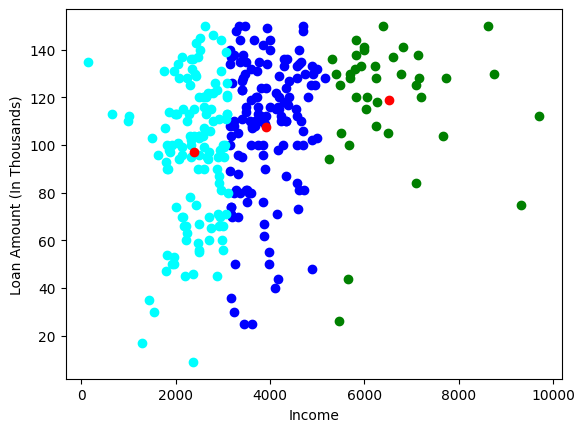

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()